Imports

In [1]:
#Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


UAL data

In [2]:
# Read UAL data from 1.1.2017 - 12.25.21

ual = pd.read_csv("Data/ual.csv",
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

ual


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.019997,74.019997,72.150002,72.709999,72.709999,2517600
2017-01-04,72.449997,73.790001,72.449997,73.019997,73.019997,2199300
2017-01-05,71.989998,73.000000,70.309998,70.930000,70.930000,3579000
2017-01-06,70.980003,71.889999,69.750000,71.370003,71.370003,3648100
2017-01-09,71.059998,72.000000,70.879997,71.279999,71.279999,1937700
...,...,...,...,...,...,...
2021-12-17,40.330002,41.619999,39.480000,40.779999,40.779999,14993800
2021-12-20,39.459999,41.709999,39.110001,41.099998,41.099998,14567200
2021-12-21,41.619999,44.230000,41.580002,43.930000,43.930000,19615800


Close price plot

<AxesSubplot:xlabel='Date'>

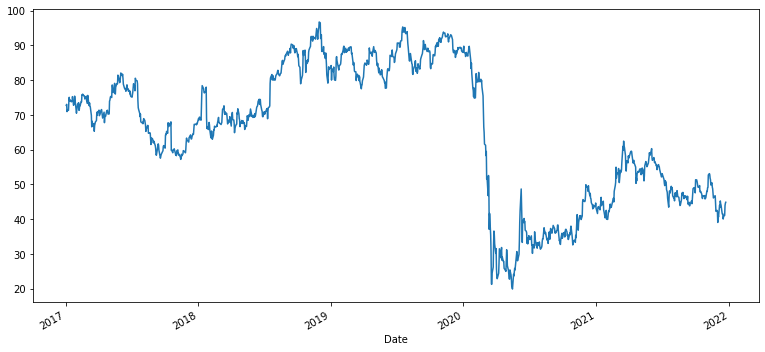

In [3]:
# Plot close price column

ual["Close"].plot(
    figsize=(13,6)
)


Sliced - Close price plot

<AxesSubplot:xlabel='Date'>

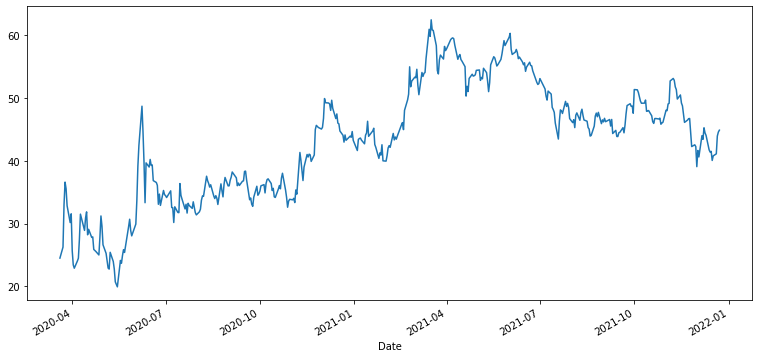

In [13]:
# Plot close price column after pandemic crash

ual_sliced = ual["Close"].loc["2020-3-20":"2021-12-25"]

ual_sliced.plot(
    figsize=(13,6)
)


Sliced - Sharpe

In [16]:
# annual returns

ual_sliced_annual_returns = (ual_sliced.pct_change().dropna()).mean() * 252


# annual std deviation

ual_sliced_annual_std = ((ual_sliced.pct_change().dropna()).std()) * np.sqrt(252)


# sharpe ratio

ual_sliced_sharpe = ual_sliced_annual_returns / ual_sliced_annual_std


print(f"sliced returns    {ual_sliced_annual_returns}")

print(f"sliced std    {ual_sliced_annual_std}")

print(f"sliced sharpe    {ual_sliced_sharpe}")


sliced returns    0.6063521324351185
sliced std    0.736876201149243
sliced sharpe    0.8228683888683646
